In [1]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

      Lab    T       a    W      B      b    da    Kjc     ys      e   klim  \
0    GKSS -154   14.47   25   12.5  10.53  0.00   54.8  674.5  237.6  237.2   
1    GKSS -154   14.17   25   12.5  10.83  0.00   49.8  674.5  237.6  240.5   
2    GKSS -154   14.15   25   12.5  10.85  0.00   37.8  674.5  237.6  240.8   
3    GKSS -154   14.36   25   12.5  10.64  0.00   33.0  674.5  237.6  238.4   
4    GKSS -154   14.06   25   12.5  10.94  0.00   38.9  674.5  237.6  241.8   
..    ...  ...     ...  ...    ...    ...   ...    ...    ...    ...    ...   
641  GKSS    0  113.65  200  100.0  86.35  0.41  307.6  473.3  227.5  556.7   
642  GKSS    0  111.81  200  100.0  88.19  0.81  383.0  473.3  227.5  562.6   
643  GKSS    0  113.63  200  100.0  86.37  0.57  332.6  473.3  227.5  556.8   
644  GKSS    0  112.54  200  100.0  87.46  0.00  223.6  473.3  227.5  560.3   
645  GKSS    0  111.92  200  100.0  88.08  1.16  442.2  473.3  227.5  562.2   

    data  kjc1T  
0    YES   54.8  
1    YES   49.8

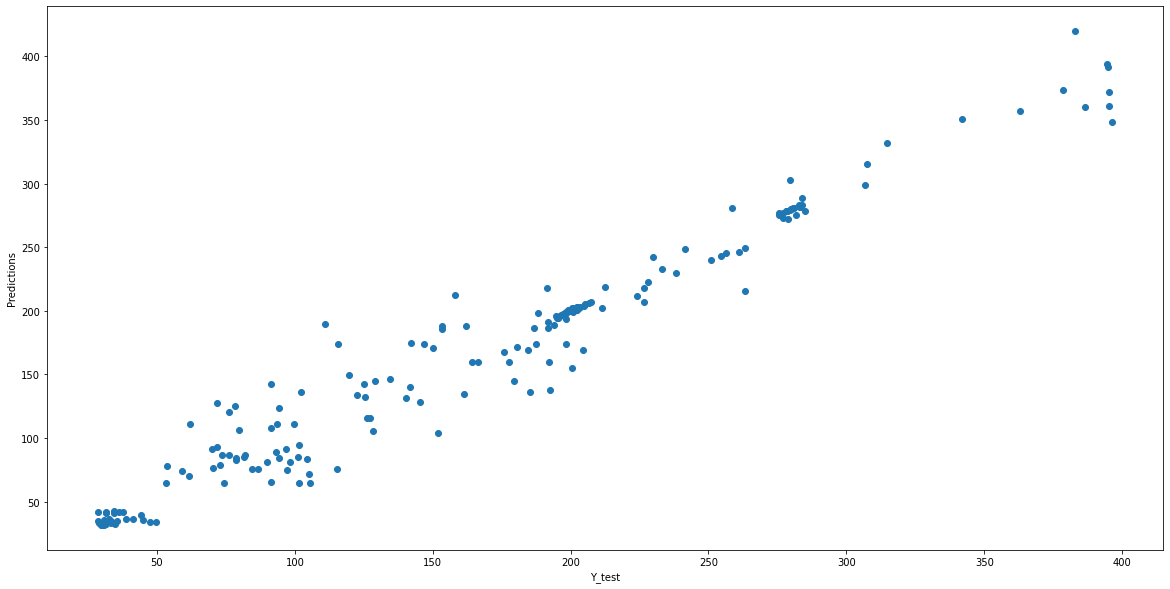

In [4]:
#including all values in the dataset

df=pd.read_excel('input/SCKCEN Dataset -2.xlsx')

df.dropna(inplace=True)

print(df)

#dropping not useful columns using random forest regressor

X=df.drop(['Kjc','klim','data','Lab','kjc1T'],axis=1)
y=df['kjc1T']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

rf=RandomForestRegressor()

rf.fit(X_train,y_train)

predictions=rf.predict(X_test)

mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
r2=r2_score(y_test,predictions)
rms=math.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rms}')

plt.figure(figsize=(20,10))

plt.scatter(y_test,predictions)
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.savefig('Y_testVSPredictions.png',dpi=100)




In [12]:
#combining all the test dataset
df1=pd.DataFrame({'Y-test':np.array(y_test.values),'predictions':np.array(predictions)})

print("DF1")
print(df1)

print("DF2")
df2=X_test
print(df2)

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df3 = pd.concat( [df1, df2], axis=1) 

print("CONCATENATED")
print(df3)

df3.rename(columns={"Y-test": "trueValue"},inplace=True)


DF1
     Y-test  predictions
0     191.9   190.851500
1     200.7   200.696000
2     134.5   146.419000
3     158.1   212.314000
4     226.8   217.901000
..      ...          ...
189   127.2   115.806000
190   314.9   331.854000
191   396.5   348.367000
192   110.9   189.474286
193   203.2   202.575000

[194 rows x 2 columns]
DF2
      T       a    W      B      b    da     ys      e
0   -40   56.33  100   50.0  43.67  0.14  492.0  230.1
1   -20   14.03   25   12.5  10.97  2.83  481.3  228.8
2   -40   56.67  100   50.0  43.33  0.00  492.0  230.1
3   -40   28.13   50   25.0  21.87  0.00  492.0  230.1
4   -40   28.32   50   25.0  21.68  0.00  492.0  230.1
..   ..     ...  ...    ...    ...   ...    ...    ...
189 -91   14.52   25   12.5  10.48  0.01  538.9  233.5
190   0  113.15  200  100.0  86.85  0.48  473.3  227.5
191   0   56.20  100   50.0  43.80  1.65  473.3  227.5
192 -20   56.01  100   50.0  43.99  0.00  481.3  228.8
193 -40   14.06   25   12.5  10.94  0.83  492.0  230.1

[194 ro

In [50]:
#function to plot at a particular temperature with the given database


def plotatTemp(df,name,temp=math.nan,f1=18,f2=12,tosave=True):
    df10=df
    
    if(not math.isnan(temp)):
        df10=df10[df['T']==temp]
        print(df10)
    mse=mean_squared_error(df10['trueValue'],df10['predictions'])
    mae=mean_absolute_error(df10['trueValue'],df10['predictions'])
    r2=r2_score(df10['trueValue'],df10['predictions'])
    rms=math.sqrt(mse)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R2 Score: {r2}')
    print(f'Root Mean Squared Error: {rms}')
    
    sh=df10.shape  
    plt.figure(figsize=(f1,f2))
    plt.plot(range(0,sh[0]),df10['trueValue'],label='trueValue')
    plt.plot(range(0,sh[0]),df10['predictions'],label='predictions')
    plt.plot(range(0,sh[0]),df10['predictions']-df10['trueValue'],label='error[predictions-true]',color='red')
    for x in range(0,sh[0]):
        plt.annotate(math.floor(df10['predictions'].tolist()[x]-df10['trueValue'].tolist()[x]),(x,df10['predictions'].tolist()[x]-df10['trueValue'].tolist()[x]))
    for x in range(0,sh[0]):
        plt.annotate(math.floor(df10['predictions'].tolist()[x]),(x,df10['predictions'].tolist()[x]))
    plt.legend()
    plt.title(name)
    if(tosave):
        plt.savefig('output/'+name,dpi=200)
    return

     trueValue  predictions  T       a    W      B      b    da     ys      e
12       197.2      197.405  0   14.17   25   12.5  10.83  2.36  473.3  227.5
17       196.7      196.808  0   14.22   25   12.5  10.78  2.47  473.3  227.5
19       275.5      275.355  0   28.85   50   25.0  21.15  4.56  473.3  227.5
20       275.9      275.946  0   28.79   50   25.0  21.21  4.57  473.3  227.5
23       278.6      278.833  0   28.37   50   25.0  21.63  4.54  473.3  227.5
25       395.2      361.351  0   56.49  100   50.0  43.51  2.50  473.3  227.5
28       276.9      276.945  0   28.63   50   25.0  21.37  4.22  473.3  227.5
30       226.7      206.874  0  112.75  200  100.0  87.25  0.14  473.3  227.5
36       238.2      229.695  0  112.47  200  100.0  87.53  0.22  473.3  227.5
45       279.7      279.630  0   28.21   50   25.0  21.79  5.01  473.3  227.5
48       395.4      371.929  0   56.44  100   50.0  43.56  1.33  473.3  227.5
52       202.4      202.730  0   13.59   25   12.5  11.41  2.57 

     trueValue  predictions    T      a   W     B      b   da     ys      e
5         81.6    85.249083 -110  14.62  25  12.5  10.38  0.0  567.6  234.7
11        61.5    70.227226 -110  14.14  25  12.5  10.86  0.0  567.6  234.7
15        70.4    76.598750 -110  14.30  25  12.5  10.70  0.0  567.6  234.7
39        91.2    65.105000 -110  14.25  25  12.5  10.75  0.0  567.6  234.7
47       105.6    64.664883 -110  14.35  25  12.5  10.65  0.0  567.6  234.7
57       101.5    64.999883 -110  14.36  25  12.5  10.64  0.0  567.6  234.7
95        74.2    64.999883 -110  14.36  25  12.5  10.64  0.0  567.6  234.7
131       53.4    64.664883 -110  14.35  25  12.5  10.65  0.0  567.6  234.7
133       78.6    82.704750 -110  14.66  25  12.5  10.34  0.0  567.6  234.7
144       98.1    81.379733 -110  14.51  25  12.5  10.49  0.0  567.6  234.7
151       59.0    74.102400 -110  14.34  25  12.5  10.66  0.0  567.6  234.7
158      115.3    76.013000 -110  14.20  25  12.5  10.80  0.0  567.6  234.7
161       71

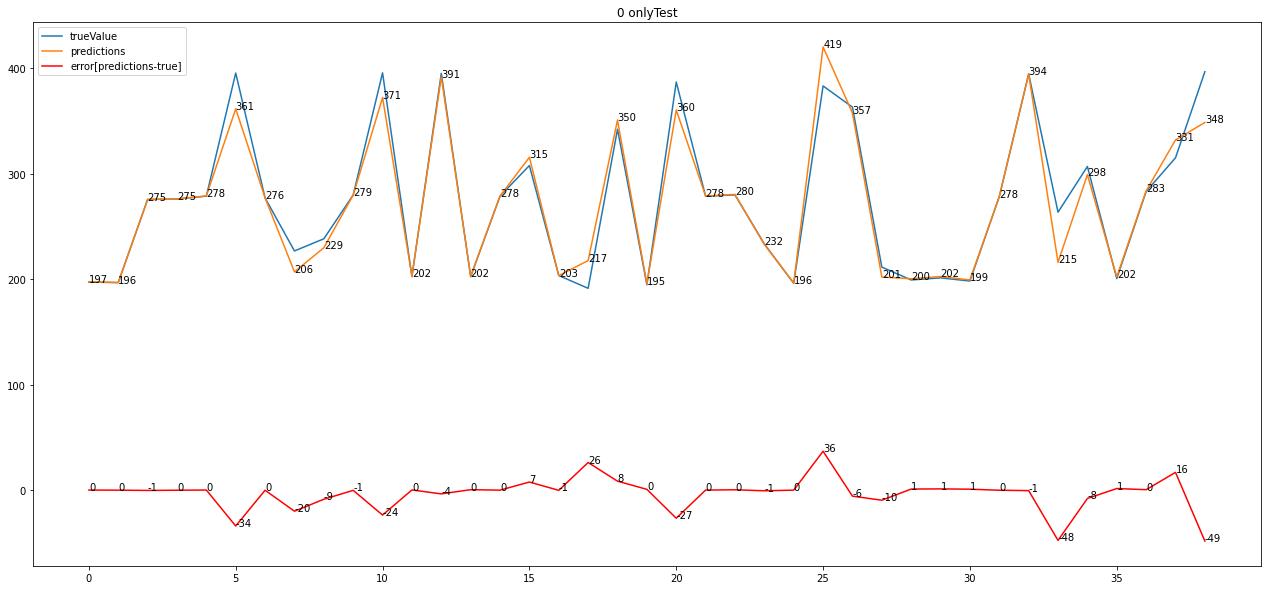

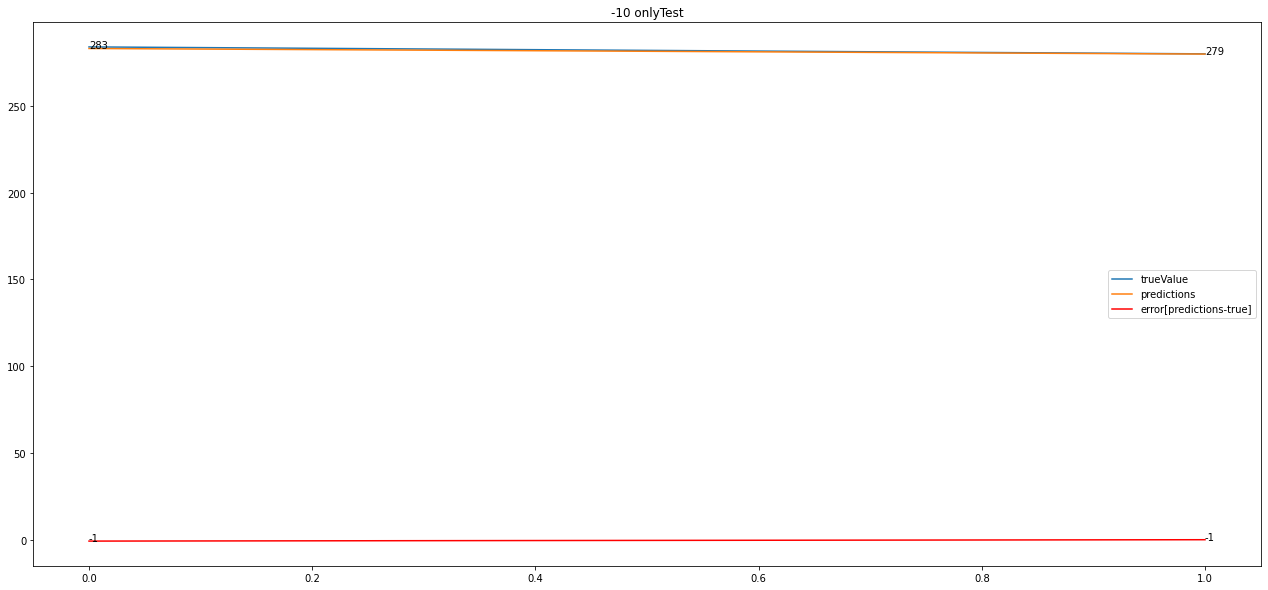

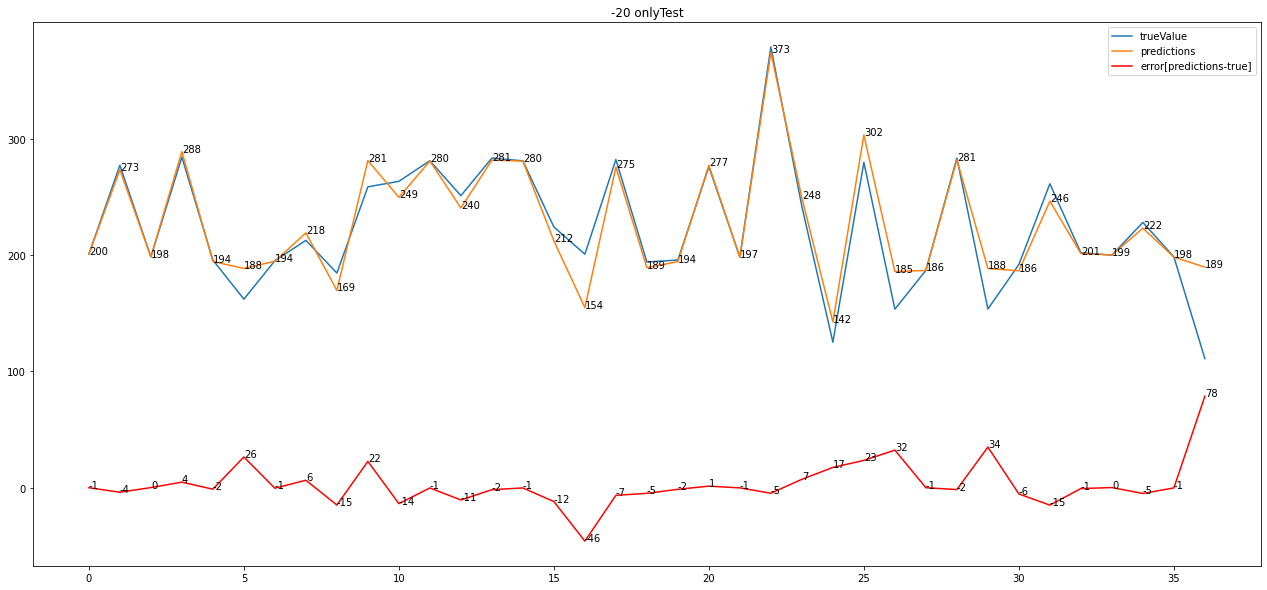

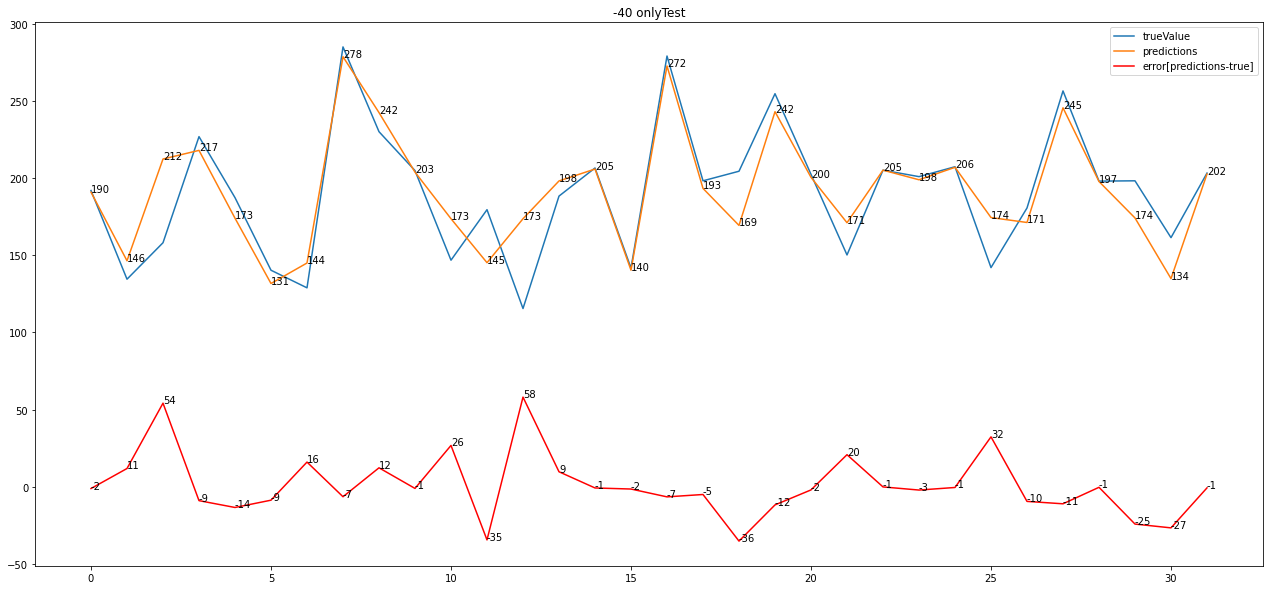

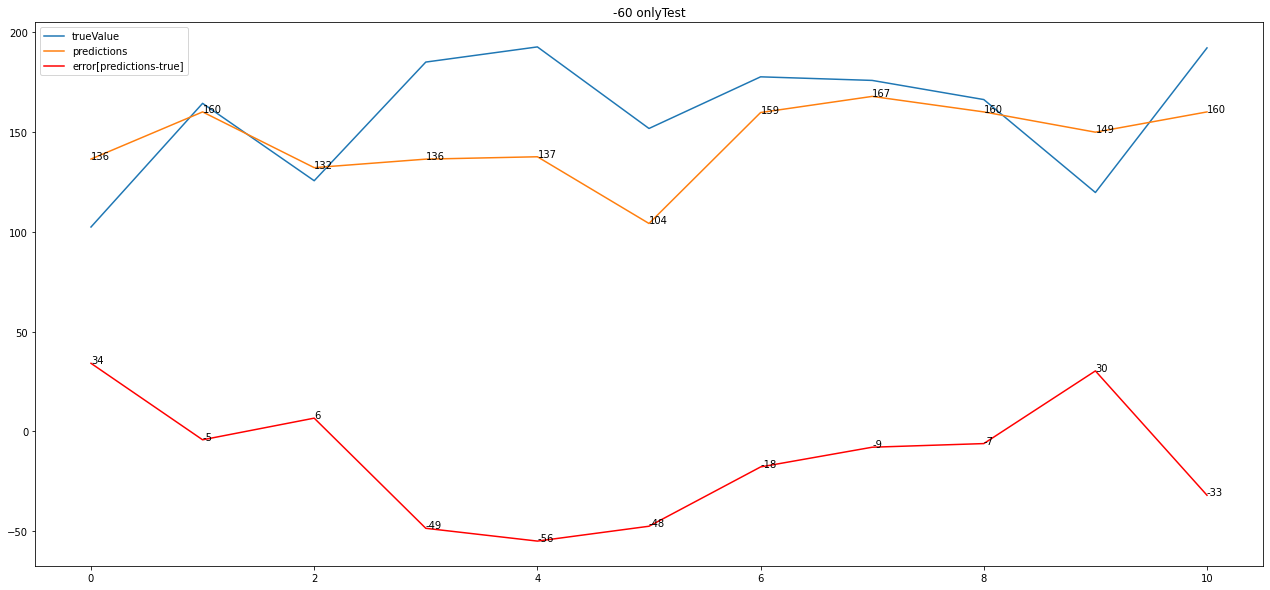

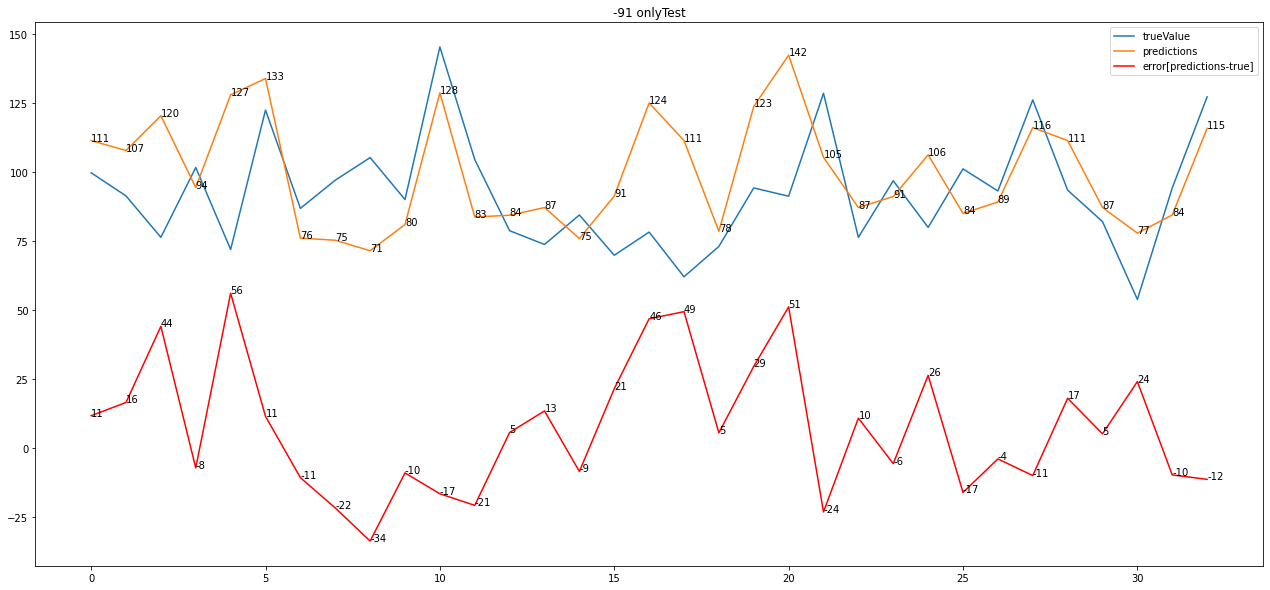

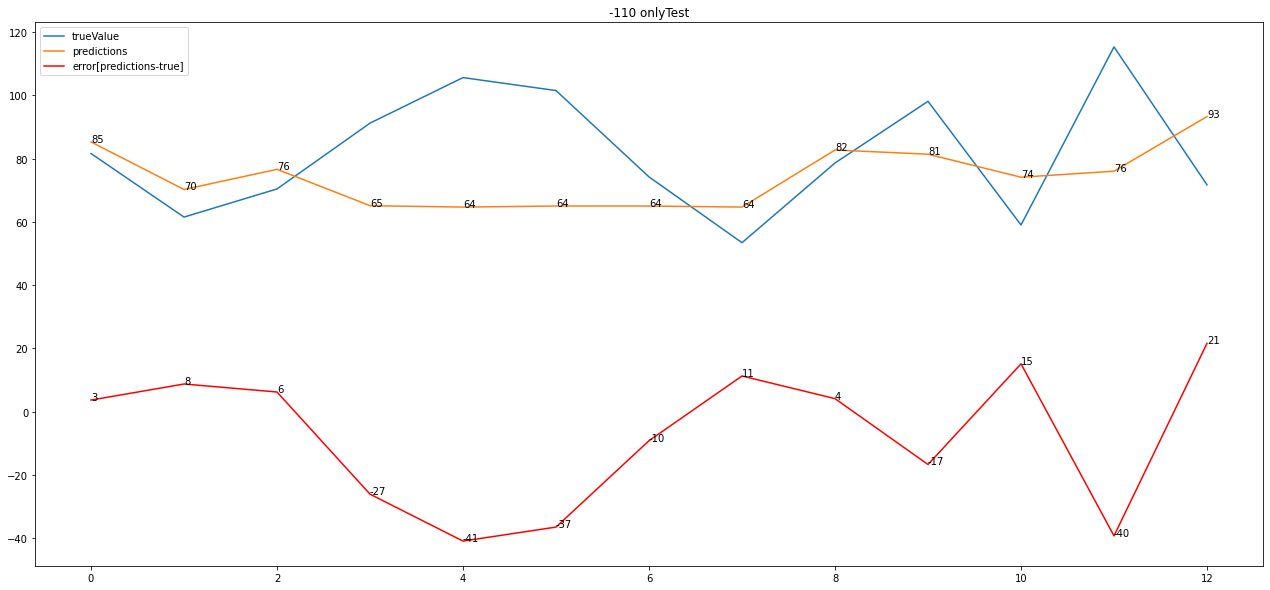

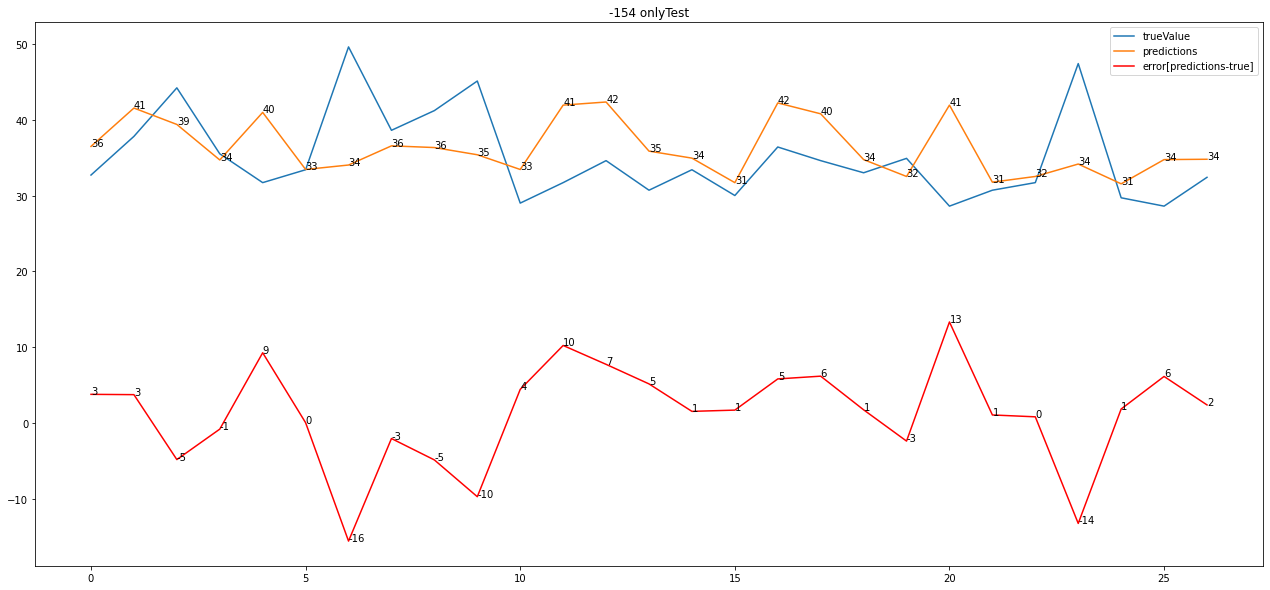

In [51]:
#plotting for a particular temperature
tempList=[0,-10,-20,-40,-60,-91,-110,-154]
for t in tempList:
    plotatTemp(df3,f'{t} onlyTest',temp=t,f1=22,f2=10,tosave=False)

In [ ]:
#MERGING the training and test dataset now

predictionsOnTrain=rf.predict(X_train)

print("TRAINING DATASET")

df4=X_train
print("X_TRAIN\n\n")
print(df4)
df5=y_train
print("Y_TRAIN\n\n")
print(df5)

df6=pd.DataFrame({'Y-test':np.array(y_train.values),'predictions':np.array(predictionsOnTrain)})

df4.reset_index(drop=True, inplace=True)
df6.reset_index(drop=True, inplace=True)

df7 = pd.concat( [df4, df6], axis=1) 

print("\n\nTrain  Concatenated\n\n")

print(df7)

df8=pd.concat([df7,df3])
df8.reset_index(drop=True,inplace=True)

df8.rename(columns={"Y-test": "trueValue"},inplace=True)

print("Training and Test Merged\n\n")

print(df8)

#df8.to_excel('Output/predicted_Values.xlsx',sheet_name='Sheet1')

In [ ]:
#function to calculate residual standard error take parameters true value and predicted value
def RSE(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse